Paquetes necesarios

In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [4]:
#Dimensiones de la imagen a crear
ancho = 200
alto = 300

Imagen en grises

In [5]:
#Crea una imagen de un único plano, que se interpreta como nivel de gris (0 negro, 255 blanco)
gris_img = np.zeros((ancho,alto,1), dtype = np.uint8)
#Muestra dimensiones de la imagen creada
print(gris_img.shape)

(200, 300, 1)


Muestra imagen con imshow (OpenCV) en ventana independiente

In [6]:
#Muestra la imagen (negra al inicializarse a 0) con las utilidades de OpenCV en una ventana independiente
cv2.imshow('Imagen', gris_img)
#cv2.imshow('Imagen2', gris_img)

cv2.waitKey(-1) # Se detiene hasta pulsar tecla (>0 milisegundos)
cv2.destroyAllWindows() # Destruye todas las ventanas

Muestra imagen con matplotlib

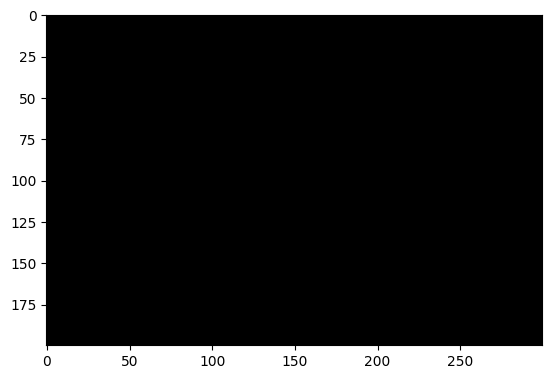

In [7]:
#Muestra la imagen con matplotlib, aparece integrada en el cuaderno
#Es necesario especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray') #default: 'viridis'
#plt.imshow(gris_img)
plt.show()

#replicar una imagen de gris creando una imagen gris pero con tres planos (RGB)
#img2 = cv2.merge((gris_img,gris_img,gris_img))
#plt.imshow(img2)
#plt.show()

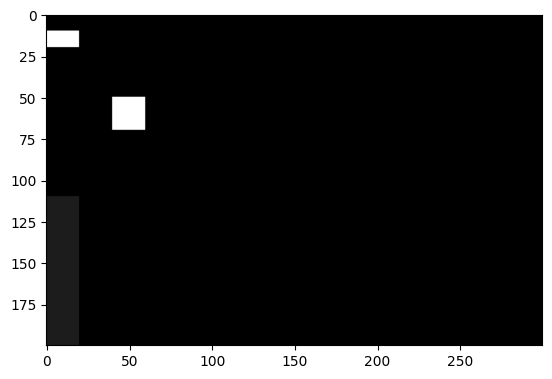

In [8]:
#Modifica un par de zonas rectangulares de la imagen
#gris_img[:,:] = 0 #A negro
gris_img[10:20,0:20,0] = 255 #Especifica el canal 0
gris_img[110:220,0:20,0] = 28 #
gris_img[50:70,40:60] = 255 #realmente no es necesario con un único plano

#Muestra la imagen con matplotlib
#Es necesario especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray')
plt.show()

Imagen con tono de gris aleatorio

(200, 300, 1)


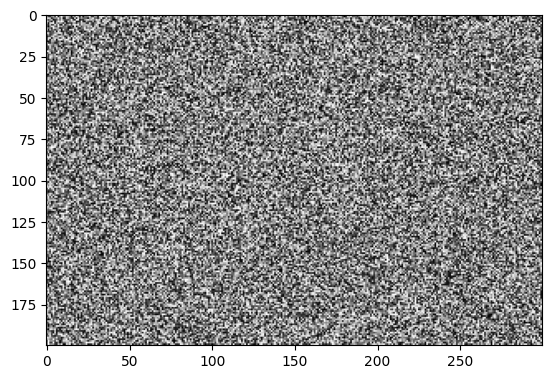

In [9]:
#Crea imagen con un único plano (gris)
gris_img = np.random.randint(255, size=(ancho,alto, 1))
#Muestra dimensiones
print(gris_img.shape)
#Visualiza
plt.imshow(gris_img, cmap='gray') #Visualiza con mapa de color gris
plt.show()

Asignamos valor a los píxeles de una zona concreta

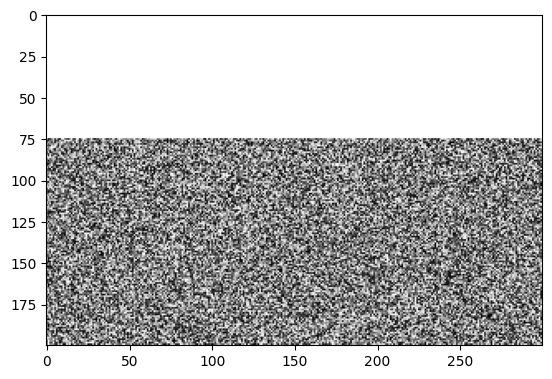

In [10]:
#Modifica la primera mitad de la imagen, asignando 255, es decir blanco
gris_img[0:int(alto/4),:,:] = 255
#Visualiza con mapa de color gris
plt.imshow(gris_img, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.show()

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

Imagen en color

(800, 800, 3)


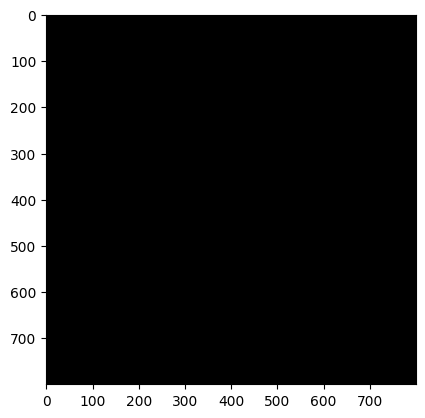

In [11]:
#Crea una imagen con tres planos
color_img = np.zeros((800,800,3), dtype = np.uint8)
img_size = 800
square_size = img_size // 8
#Dimensiones
print(color_img.shape)
#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


0 0
0 200
0 400
0 600
200 0
200 200
200 400
200 600
400 0
400 200
400 400
400 600
600 0
600 200
600 400
600 600


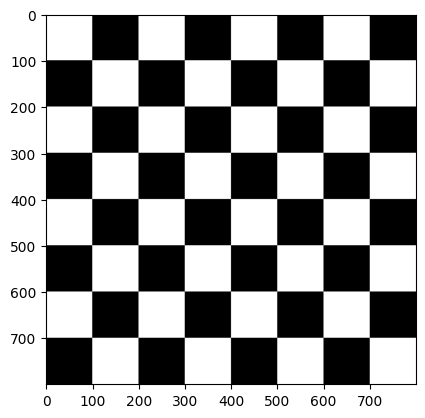

In [12]:
#Modifica el primer plano de color (Rojo, ya que es RGB)
color_img[:,:,0] = 0 

for i in range(0, img_size, square_size * 2):
    for j in range(0, img_size, square_size * 2):
        print(i,j)
        color_img[i:i + square_size, j:j + square_size] = 255
        color_img[i + square_size:i + 2 * square_size, j + square_size:j + 2 * square_size] = 255

        
#color_img[700:800,700:800] = 1 #realmente no es necesario con un único plano

#color_img[:,:,1] = 200 #Prueba otras combinaciones
#color_img[:,:,2] = 255 
plt.imshow(color_img) 
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

Funciones de dibujo.
OpenCV dispone de distintas funciones específicas para dibujar formas básicas (más información https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html )

100.0


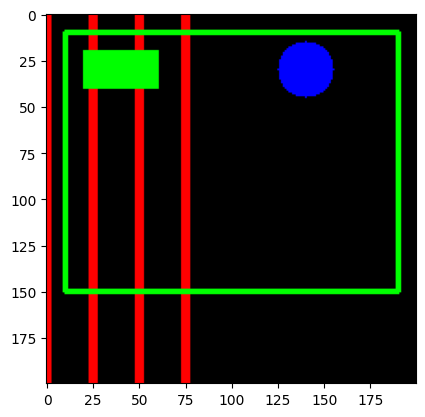

True

In [13]:
#Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)
color_img[:,:,0] = 0 

#Línea roja vertical de grosor 3
for i in range(0,ancho,50):
    for j in range(0,ancho,50):
        cv2.line(color_img,(int(i/2),j),(int(i/2),alto),(255,0,0),3)


#cv2.line(color_img,(int(ancho/2),0),(int(ancho/2),alto),(255,0,0),3)
print(ancho/2)
#Rectángulo con grosor 2
cv2.rectangle(color_img,(10,10),(ancho-10,int(alto/2)),(0,255,0),2)
#Rectángulo relleno
cv2.rectangle(color_img,(20,20),(60,40),(0,255,0),-1)
#Círculo de radio 15 relleno
cv2.circle(color_img,(ancho-60,30), 15, (0,0,255), -1)
#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

Abrir imagen almacenada en disco

In [14]:
import numpy as np
import cv2
#Realizamos el ejercicio del tablero del ajedrez pero con funciones de OpenCV
width, height = 800, 800

image = np.zeros((height, width, 3), dtype=np.uint8)
square_size = width // 8

# Definir colores
white = (255, 255, 255)
black = (0, 0, 0)

# Dibujar el tablero de ajedrez
for i in range(8):
    for j in range(8):
        if (i + j) % 2 == 0:
            color = white
        else:
            color = black
        x1, y1 = j * square_size, i * square_size
        x2, y2 = (j + 1) * square_size, (i + 1) * square_size
        cv2.rectangle(image, (x1, y1), (x2, y2), color, -1)

# Mostrar la imagen
cv2.imshow("Tablero de Ajedrez", image)
cv2.waitKey(0)


-1

Abre un archivo de vídeo

In [15]:
vid = cv2.VideoCapture('smurfing.mp4') #Busca n vídeo propio
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:  
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(1000) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

KeyboardInterrupt: 

Muestra entrada de la cámara

In [16]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
  
    if ret:  
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Separa los tres planos de la imagen captada por la webcam

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones
        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Modifica de alguna forma los valores de un plano de la imagen

In [ ]:
vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:  
        negative_frames = 255 - frame
        # Muestra fotograma
        cv2.imshow('Negative', negative_frames)
        
        
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


Evento de ratón para mostrar el valor RGB del píxel

In [17]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  

        px = x
        py = y

     
  

In [18]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa em manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1
            
        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [29]:
vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    
    color_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    min_intensity = np.min(color_frame)
    max_intensity = np.max(color_frame)
    
    dark_pixel_coords = np.argwhere(color_frame == min_intensity)
    bright_pixel_coords = np.argwhere(color_frame == max_intensity)

    for coord in dark_pixel_coords:
        #frame[coord[0], coord[1]] = [0, 0, 255]  # Marca los píxeles en rojo
        #print(dark_pixel_coords)
        cv2.circle(frame,(coord[1],coord[0]), 4, (0,0,255), -1)

    for coord2 in bright_pixel_coords:
        cv2.circle(frame,(coord2[1],coord2[0]), 4, (0,255,0), -1)

    cv2.imshow('Pixeles mas oscuros', frame)

    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


Pop art
Salida de la webcam "inspirada" en Andy Warhol

In [31]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tr[:,:,0] = 255 - r
        tr[:,:,1] = g
        tr[:,:,2] = b
        
        bl[:,:,0] = r
        bl[:,:,1] = 255 - b
        bl[:,:,2] = g

        br[:,:,0] = b
        br[:,:,1] = g
        br[:,:,2] = 255 - r
    
        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Transformando la imagen capturada en una colección de círculos, cuyo radio depende de la intensidad promedio de la zona

In [32]:
vid = cv2.VideoCapture(0)

ncells = 10
off = int(ncells/2)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Dimensiones originales
        h, w, c = frame.shape
        #Redimensiono
        down_frame = cv2.resize(frame, (int(w/ncells),int(h/ncells)),cv2.INTER_NEAREST)
        #Dimensiones reducidas
        h2, w2, c2 = down_frame.shape

        #Separamos canales
        r = down_frame[:,:,0]
        g = down_frame[:,:,1]
        b = down_frame[:,:,2]

        # Creamos imagen negra
        gris_up_frame = np.zeros((h2*ncells,w2*ncells,1), dtype = np.uint8)

        for y in range(0,h2):
            for x in range(0,w2):
                # La suma de los valores RGB define el radio del círculo
                rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))
                cv2.circle(gris_up_frame,(x*ncells+off, y*ncells + off), rad, (255,255,255), -1)

    
        # Muestra fotograma resultante
        cv2.imshow('Cam', gris_up_frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_1016\4226927672.py:29: RuntimeWarning: overflow encountered in scalar add
  rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))


TAREA: Haz tu propuesta pop art

In [35]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()


    # Divide el frame en los canales BGR
    b, g, r = cv2.split(frame)

    # Crea los canales CMYK (cian, magenta, amarillo, negro)
    c = 255 - r
    m = 255 - g
    y = 255 - b
    k = cv2.min(c, cv2.min(m, y))

    # Combina los canales CMYK para obtener el frame resultante
    cmyk_frame = cv2.merge((c, m, y, k))

    # Muestra el frame resultante
    cv2.imshow('Pop Art', cmyk_frame)

    # Detiene el bucle si se presiona la tecla 'q'
    if cv2.waitKey(20) == 27:
        break

cap.release()
cv2.destroyAllWindows()